In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


In [5]:
start = '2014-01-01'
end   = '2024-12-21'

stock = 'GOOG'
data  = yf.download(stock,start,end)


C:\Users\Abhishek\AppData\Local\Temp\ipykernel_23516\2648893523.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data  = yf.download(stock,start,end)
[*********************100%***********************]  1 of 1 completed


In [6]:
data.reset_index(inplace=True)


In [7]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2014-01-02,27.560261,27.674898,27.439930,27.618199,73129082
1,2014-01-03,27.359213,27.654593,27.357480,27.606808,66917888
2,2014-01-06,27.664251,27.702380,27.394868,27.557538,71037271
3,2014-01-07,28.197569,28.218120,27.759328,27.854403,102486711
4,2014-01-08,28.256252,28.407038,28.059661,28.374355,90036218
...,...,...,...,...,...,...
2757,2024-12-16,197.696884,200.171084,193.656346,193.910755,32248600
2758,2024-12-17,196.659286,202.405834,196.230299,198.065995,24129500
2759,2024-12-18,189.705582,198.225631,188.837620,196.369977,27638400


In [8]:
ma_100_days = data.Close.rolling(100).mean()

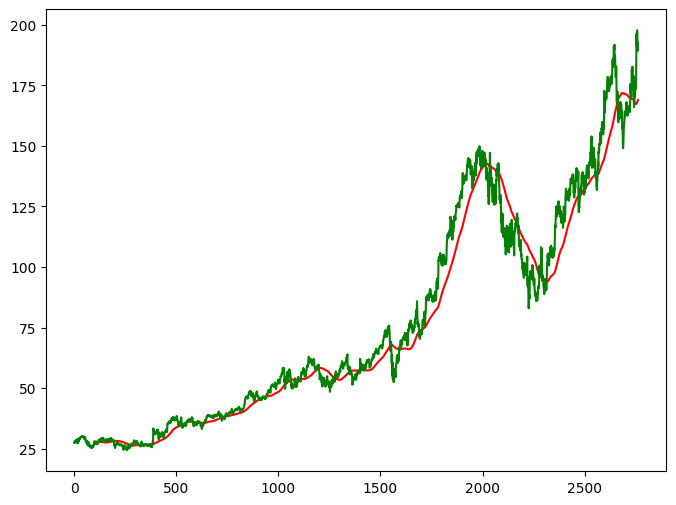

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [10]:
ma_200_days = data.Close.rolling(200).mean()


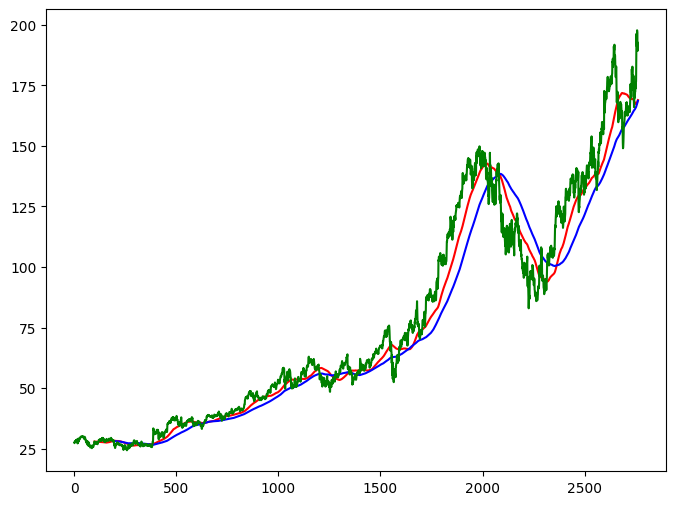

In [11]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [12]:
data.dropna(inplace = True )

In [13]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [14]:
data_train.shape[0]

2209

In [15]:
data_test.shape[0]

553

In [16]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


In [17]:
from keras.layers import Dense,Dropout, LSTM
from keras.models import Sequential

In [18]:
data_train_scale = scaler.fit_transform(data_train)

In [19]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [20]:
x, y = np.array(x), np.array(y)

In [21]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

C:\Users\Abhishek\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [23]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 23s 206ms/step - loss: 0.0573
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0071
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 205ms/step - loss: 0.0065
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 190ms/step - loss: 0.0056
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 190ms/step - loss: 0.0049
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 193ms/step - loss: 0.0052
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 192ms/step - loss: 0.0042
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 192ms/step - loss: 0.0035
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 13s 197ms/step - loss: 0.0041
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 211ms/step - loss: 0.0034
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 210ms/step - loss: 0.0041
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 210ms/step - loss: 0.0030
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 207ms/step - loss: 0.0033
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 211ms/step - loss: 0.0029
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 14s 

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [25]:
pas_100_days = data_train.tail(100)

In [26]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [27]:
data_test_scale  =  scaler.fit_transform(data_test)

In [28]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [29]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step


In [30]:
scale =1/scaler.scale_

In [31]:
y_predict = y_predict*scale

In [32]:
y = y*scale

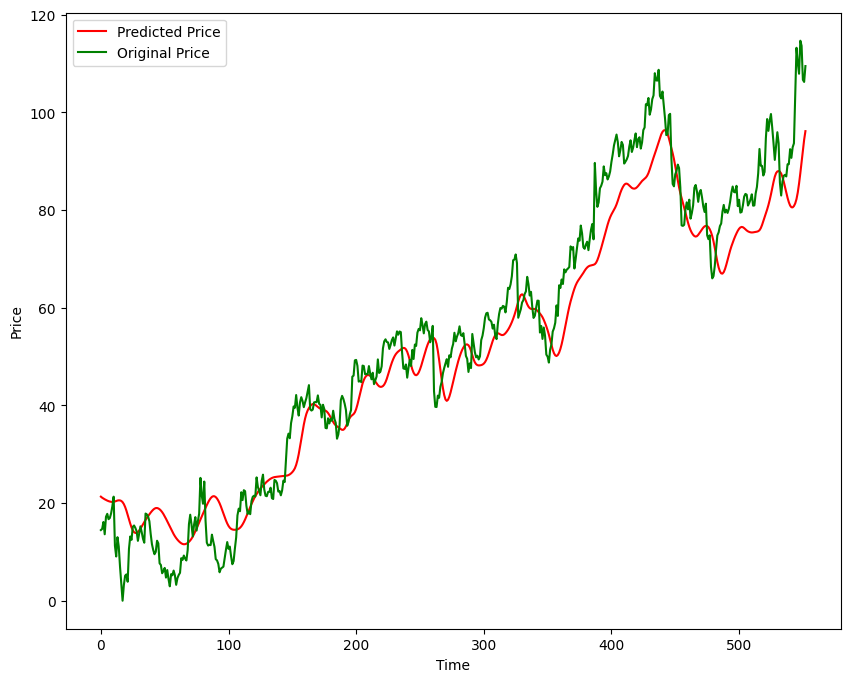

In [33]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [34]:
model.save('stock prediction model.keras')